# **Impacto del clima en la criminalidad**
El dataset contiene información sobre el clima y los delitos en Barranquilla, Colombia. Incluye variables climáticas como temperatura, humedad, precipitación y velocidad del viento, junto con datos de criminalidad organizados por fecha. Su objetivo es permitir el análisis de la posible relación entre las condiciones climáticas y la incidencia de delitos.

dataset : https://www.kaggle.com/datasets/saurabhshahane/dataset-for-weather-and-crime-in-barranquilla?resource=download




# ***Integrantes***               
* Johan Sebastian Villamizar
* Juan Sebastian Landinez
* Luis Santiago Tarazona

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
import pandas as pd
import scipy as sc
import seaborn as sns
import csv
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, probplot, norm
!pip install tabulate
from tabulate import tabulate

# **Conjunto de datos**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/database.csv', delimiter=';')

tabla = tabulate(df.head(), headers='keys', tablefmt='fancy_grid')

print(tabla)


Mounted at /content/drive
╒════╤═══════════╤════════╤═════════╤════════════════╤══════════╤══════════════╤═════════════════════╤═════════════╤═══════════╤═════════╤══════════════════╤═════════════╤═════════════╤════════════╤════════════╤═════════╤════════════╤═════════════╕
│    │ date      │   year │ month   │   number_month │ day      │   number_day │   interpersviolence │   homicides │   maxtemp │   humid │   precipitations │ windspeed   │ moonlight   │   holidays │   weekends │   fines │   vehicles │ heatindex   │
╞════╪═══════════╪════════╪═════════╪════════════════╪══════════╪══════════════╪═════════════════════╪═════════════╪═══════════╪═════════╪══════════════════╪═════════════╪═════════════╪════════════╪════════════╪═════════╪════════════╪═════════════╡
│  0 │ 1/01/2010 │   2010 │ January │              1 │ Friday   │            1 │                  31 │           2 │        33 │      78 │                0 │ 15,4        │ 1           │          1 │          0 │       2 │      

# **Datos arreglados**

In [5]:
#se corrigio para que esas casillas tuvieran valor float
num_cols = ["windspeed", "heatindex", "precipitations","maxtemp","heatindex", "moonlight"]
for col in num_cols:
    df[col] = df[col].astype(str).str.replace(",", ".").astype(float)

# se arreglo los dias, mes y año con numeros
df["date"] = pd.to_datetime(df["date"], dayfirst=True)
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month
df["day"] = df["date"].dt.day


tabla = tabulate(df.head(), headers='keys', tablefmt='fancy_grid')

print(tabla)


#print(f"\n\n{df.describe()}")
display(df.describe())



╒════╤═════════════════════╤════════╤═════════╤════════════════╤═══════╤══════════════╤═════════════════════╤═════════════╤═══════════╤═════════╤══════════════════╤═════════════╤═════════════╤════════════╤════════════╤═════════╤════════════╤═════════════╕
│    │ date                │   year │   month │   number_month │   day │   number_day │   interpersviolence │   homicides │   maxtemp │   humid │   precipitations │   windspeed │   moonlight │   holidays │   weekends │   fines │   vehicles │   heatindex │
╞════╪═════════════════════╪════════╪═════════╪════════════════╪═══════╪══════════════╪═════════════════════╪═════════════╪═══════════╪═════════╪══════════════════╪═════════════╪═════════════╪════════════╪════════════╪═════════╪════════════╪═════════════╡
│  0 │ 2010-01-01 00:00:00 │   2010 │       1 │              1 │     1 │            1 │                  31 │           2 │        33 │      78 │                0 │        15.4 │       1     │          1 │          0 │       2 │    

,date,year,month,number_month,day,number_day,interpersviolence,homicides,maxtemp,humid,precipitations,windspeed,moonlight,holidays,weekends,fines,vehicles,heatindex
count,2557,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000,2557.000000
mean,2013-07-02 00:00:00,2013.000782,6.522487,6.522487,15.730935,15.730935,9.964411,1.001955,33.251467,81.653109,2.936336,12.974099,0.499159,0.065702,0.285882,4.322253,24.417286,32.608234
min,2010-01-01 00:00:00,2010.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,28.000000,64.000000,0.000000,1.300000,0.000000,0.000000,0.000000,0.000000,0.000000,24.465000
25%,2011-10-02 00:00:00,2011.000000,4.000000,4.000000,8.000000,8.000000,6.000000,0.000000,32.000000,78.000000,0.000000,9.600000,0.150000,0.000000,0.000000,0.000000,6.000000,30.685600
50%,2013-07-02 00:00:00,2013.000000,7.000000,7.000000,16.000000,16.000000,9.000000,1.000000,33.000000,82.000000,0.000000,12.200000,0.498000,0.000000,0.000000,1.000000,23.000000,32.585600
75%,2015-04-02 00:00:00,2015.000000,10.000000,10.000000,23.000000,23.000000,12.000000,2.000000,34.000000,85.000000,0.000000,15.900000,0.850000,0.000000,1.000000,6.000000,37.000000,34.563100
max,2016-12-31 00:00:00,2016.000000,12.000000,12.000000,31.000000,31.000000,52.000000,7.000000,39.000000,97.000000,126.000000,81.000000,1.000000,1.000000,1.000000,48.000000,209.000000,41.751400
std,NaN,2.000587,3.449499,3.449499,8.802361,8.802361,5.745508,1.115229,1.669634,4.803221,11.063800,4.835540,0.351609,0.247809,0.451922,6.960836,20.584151,2.644343


# **Graficos**

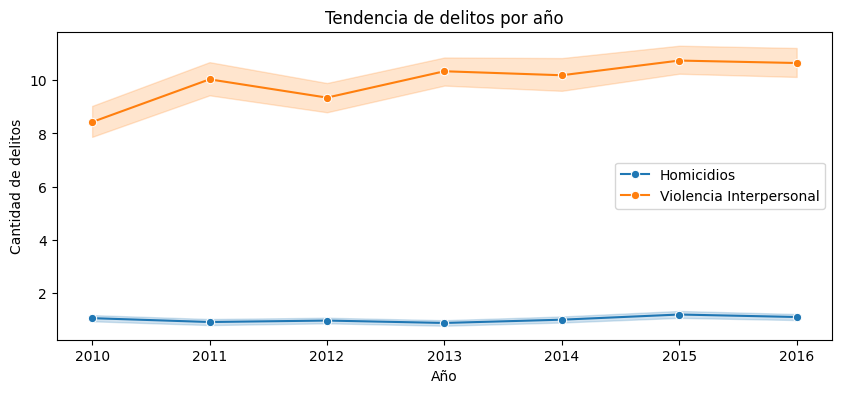

In [ ]:
# Gráfico 1: Tendencia de delitos por año (Línea)
plt.figure(figsize=(10, 4))
sns.lineplot(x=df["year"], y=df["homicides"], label="Homicidios", marker="o")
sns.lineplot(x=df["year"], y=df["interpersviolence"], label="Violencia Interpersonal", marker="o")
plt.title("Tendencia de delitos por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de delitos")
plt.legend()
plt.show()


Este gráfico de líneas permite analizar la evolución de la cantidad de delitos a lo largo de los años, identificando posibles tendencias o patrones de aumento y disminución. Es útil para observar si los delitos han crecido con el tiempo, si hay años particularmente conflictivos o si existen ciclos de criminalidad que se repiten.

<Figure size 1000x400 with 0 Axes>

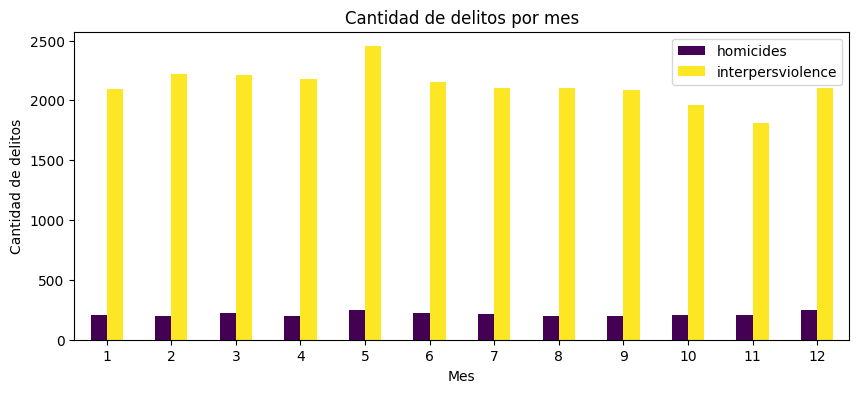

In [ ]:
# Gráfico 2: Comparación de delitos por mes (Barras)
plt.figure(figsize=(10, 4))
df.groupby("month")[["homicides", "interpersviolence"]].sum().plot(kind="bar", figsize=(10, 4), colormap="viridis" )
plt.title("Cantidad de delitos por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de delitos")
plt.xticks(rotation=0)
plt.show()

Comparar la frecuencia de delitos en cada mes del año, lo que permite identificar en qué épocas se reportan más incidentes.

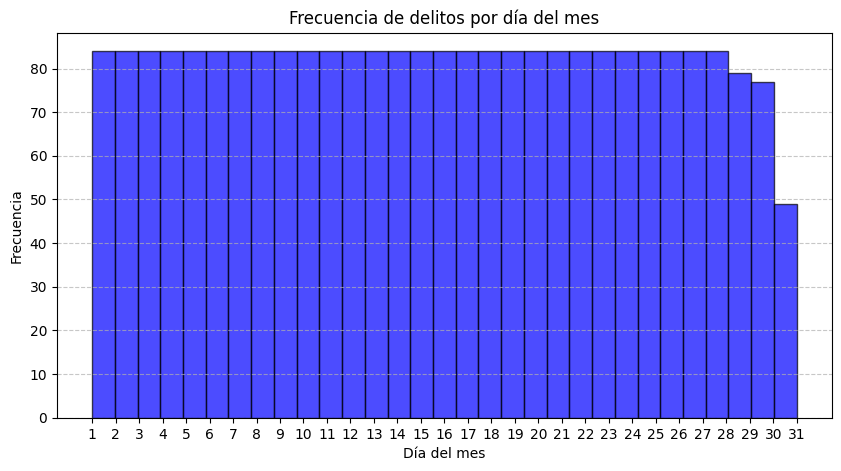

In [ ]:
# Gráfico 3: histograma de frecuencia de delitos por día del mes
plt.figure(figsize=(10, 5))
plt.hist(df["day"], bins=31, edgecolor="black", alpha=0.7, color="blue")
plt.title("Frecuencia de delitos por día del mes")
plt.xlabel("Día del mes")
plt.ylabel("Frecuencia")
plt.xticks(range(1, 32))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

ayuda a identificar si ciertos días tienden a registrar más crímenes.

### muestra el número de homicidios en los primeros 30 días con un gráfico de barras.

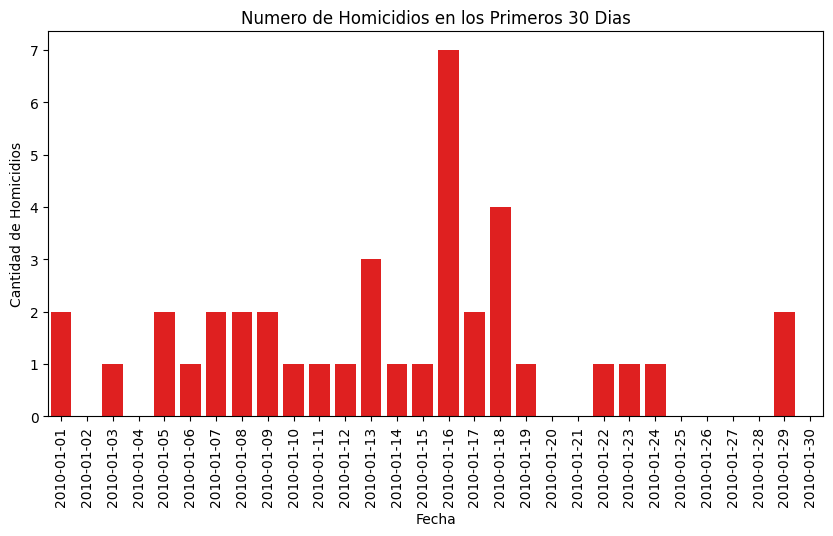

In [ ]:
# Gráfico 4: Homicidios en los primeros 30 dias
plt.figure(figsize=(10, 5))
sns.barplot(x=df["date"][:30], y=df["homicides"][:30], color="red")
plt.xticks(rotation=90)
plt.title("Numero de Homicidios en los Primeros 30 Dias")
plt.xlabel("Fecha")
plt.ylabel("Cantidad de Homicidios")
plt.show()

### Se visualiza la distribución de las temperaturas máximas con un histograma.


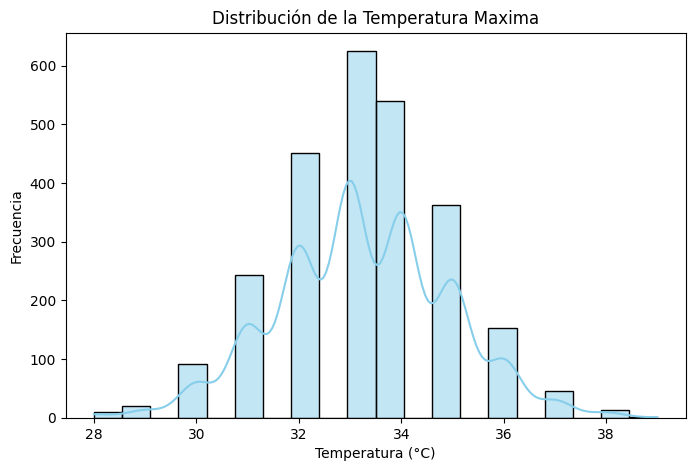

In [ ]:
# Gráfico 5: Distribucion de la temperatura
plt.figure(figsize=(8, 5))
sns.histplot(df["maxtemp"], bins=20, kde=True, color="skyblue")
plt.title("Distribución de la Temperatura Maxima")
plt.xlabel("Temperatura (°C)")
plt.ylabel("Frecuencia")
plt.show()

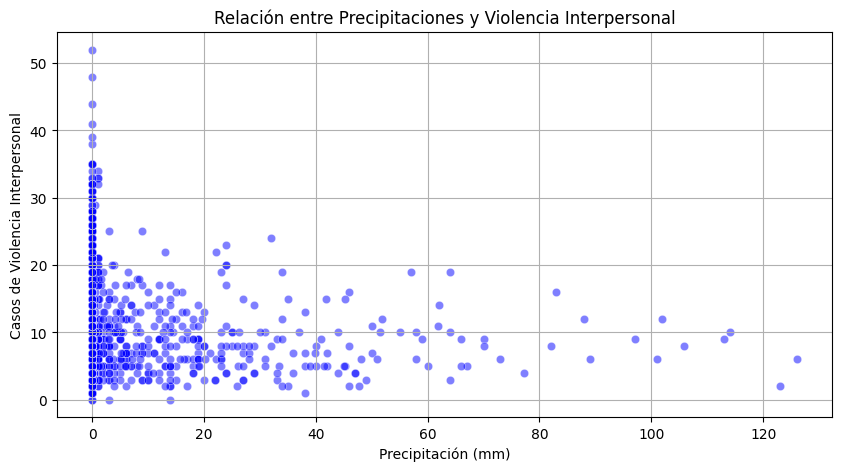

In [ ]:
#Gráfico 6: dispersión
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["precipitations"], y=df["interpersviolence"], alpha=0.5, color="blue")

plt.title("Relación entre Precipitaciones y Violencia Interpersonal")
plt.xlabel("Precipitación (mm)")
plt.ylabel("Casos de Violencia Interpersonal")
plt.grid(True)
plt.show()

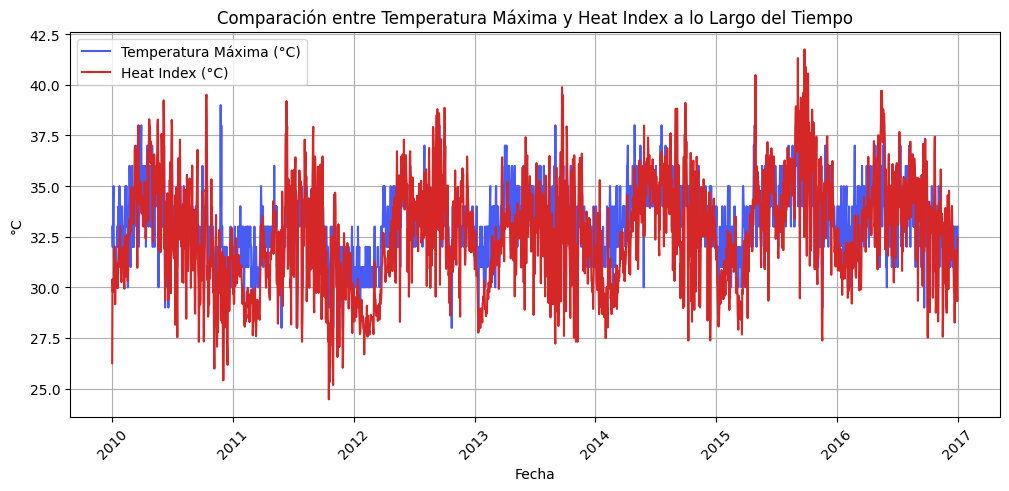

In [ ]:
# Gráfico 7: líneas
plt.figure(figsize=(12, 5))
sns.lineplot(x=df["date"], y=df["maxtemp"], label="Temperatura Máxima (°C)", color="#495bf5")
sns.lineplot(x=df["date"], y=df["heatindex"], label="Heat Index (°C)", color="#d52727")

plt.title("Comparación entre Temperatura Máxima y Heat Index a lo Largo del Tiempo")
plt.xlabel("Fecha")
plt.ylabel("°C")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

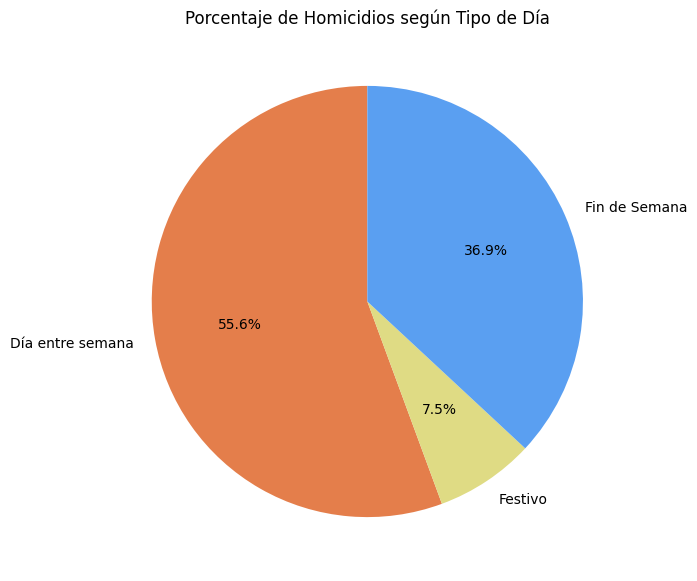

In [ ]:
# Gráfico 8: pastel
df["day_type"] = df.apply(lambda row: "Festivo" if row["holidays"] == 1 else ("Fin de Semana" if row["weekends"] == 1 else "Día entre semana"), axis=1)

# Contar homicidios por tipo de día
homicide_counts = df.groupby("day_type")["homicides"].sum()

plt.figure(figsize=(7, 7))
colors = ["#e47e4b", "#dfdb84", "#5a9ff1"]
plt.pie(homicide_counts, labels=homicide_counts.index, autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Porcentaje de Homicidios según Tipo de Día")
plt.show()

<ipython-input-31-0d7c9dc28b5a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  moon_crime_counts = df.groupby("moonlight_range")["homicides"].sum()
<ipython-input-31-0d7c9dc28b5a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=moon_crime_counts.index, y=moon_crime_counts.values, palette="coolwarm")


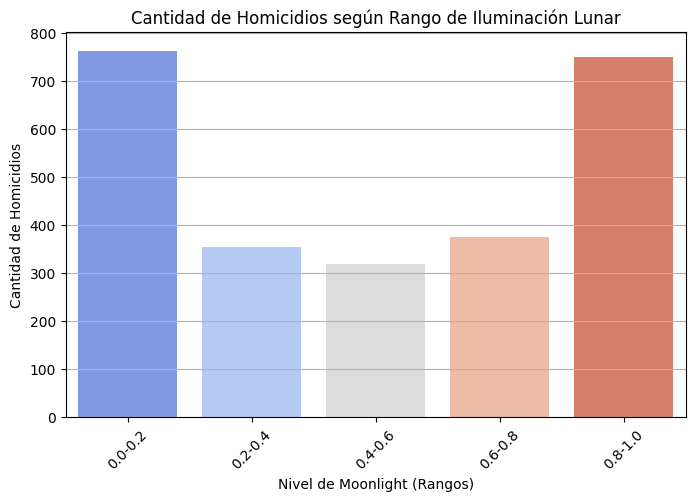

In [ ]:
#gráfico 9 : homicidios segun rango de iluminacion lunar
bins = np.arange(0, 1.2, 0.2)  # De 0 a 1 en intervalos de 0.2
labels = ["0.0-0.2", "0.2-0.4", "0.4-0.6", "0.6-0.8", "0.8-1.0"]

# Asignar cada valor a un rango
df["moonlight_range"] = pd.cut(df["moonlight"], bins=bins, labels=labels, include_lowest=True)

# Contar homicidios por rango de moonlight
moon_crime_counts = df.groupby("moonlight_range")["homicides"].sum()


plt.figure(figsize=(8, 5))
sns.barplot(x=moon_crime_counts.index, y=moon_crime_counts.values, palette="coolwarm")

plt.title("Cantidad de Homicidios según Rango de Iluminación Lunar")
plt.xlabel("Nivel de Moonlight (Rangos)")
plt.ylabel("Cantidad de Homicidios")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

##<font color="red">**Entrega 2**

In [ ]:
#@title #Importando librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set_theme()
pd.__version__
from __future__ import division, print_function, unicode_literals #py2 and py3
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.naive_bayes import GaussianNB



In [ ]:
#@title Usando Violencia interpersonal con regresion
# Definir variable objetivo y características
target = 'interpersviolence'
features = df.drop(columns=['date', 'month', 'day', target])

# Convertir variables categóricas a numéricas
features = pd.get_dummies(features)

# Separar X e y
X = features
y = df[target]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
svm = SVR()

# Entrenar modelos
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

# Predecir
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test_scaled)

# Calcular MAE
dt_mae = mean_absolute_error(y_test, dt_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
svm_mae = mean_absolute_error(y_test, svm_pred)

print("MAE DT:", dt_mae)
print("MAE RF:", rf_mae)
print("MAE SVM:", svm_mae)

MAE DT: 5.037109375
MAE RF: 3.69568359375
MAE SVM: 3.5737750392262724


In [ ]:
#@title Los días festivos en los que se reportaron homicidios
target = 'holidays'

# Variables predictoras (eliminamos columnas irrelevantes o que contienen el target)
features = df.drop(columns=['date', 'month', 'day', 'interpersviolence', target])
features = pd.get_dummies(features)  # Convertir variables categóricas

X = features
y = df[target]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar para SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Definir modelos (sin parámetros personalizados)
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svm = SVC()

# Entrenar modelos
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
svm.fit(X_train_scaled, y_train)

# Predecir
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
svm_pred = svm.predict(X_test_scaled)

# Calcular precisión (accuracy)
dt_acc = accuracy_score(y_test, dt_pred)
rf_acc = accuracy_score(y_test, rf_pred)
svm_acc = accuracy_score(y_test, svm_pred)

print("Accuracy DT:", dt_acc)
print("Accuracy RF:", rf_acc)
print("Accuracy SVM:", svm_acc)

Accuracy DT: 0.92578125
Accuracy RF: 0.958984375
Accuracy SVM: 0.94140625


Analizando el impacto de la profundidad del árbol en el rendimiento (regresión)...
  Profundidad  1: MAE promedio = 3.7724 | Desviación estándar = ±0.2137
  Profundidad  2: MAE promedio = 3.7441 | Desviación estándar = ±0.2217
  Profundidad  3: MAE promedio = 3.7119 | Desviación estándar = ±0.2190
  Profundidad  4: MAE promedio = 3.6854 | Desviación estándar = ±0.2541
  Profundidad  5: MAE promedio = 3.6878 | Desviación estándar = ±0.2679
  Profundidad  6: MAE promedio = 3.8191 | Desviación estándar = ±0.2603
  Profundidad  7: MAE promedio = 3.8733 | Desviación estándar = ±0.2640
  Profundidad  8: MAE promedio = 4.0246 | Desviación estándar = ±0.2394
  Profundidad  9: MAE promedio = 4.1498 | Desviación estándar = ±0.2565
  Profundidad 10: MAE promedio = 4.2677 | Desviación estándar = ±0.3015
  Profundidad 11: MAE promedio = 4.4083 | Desviación estándar = ±0.2349
  Profundidad 12: MAE promedio = 4.5338 | Desviación estándar = ±0.2441
  Profundidad 13: MAE promedio = 4.6293 | Desviación 

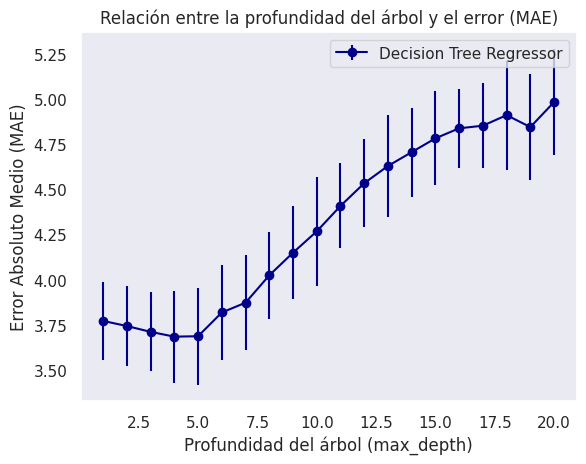

In [ ]:
#@title Curvas para Decision Tree

depths = range(1, 21)
dt_means, dt_stds = [], []

print("Analizando el impacto de la profundidad del árbol en el rendimiento (regresión)...")

for d in depths:
    model = DecisionTreeRegressor(max_depth=d)
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=KFold(n_splits=10, shuffle=True, random_state=42),
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    mean = -scores.mean()
    std = scores.std()
    dt_means.append(mean)
    dt_stds.append(std)

    print(f"  Profundidad {d:>2}: MAE promedio = {mean:.4f} | Desviación estándar = ±{std:.4f}")

plt.figure()
plt.errorbar(depths, dt_means, yerr=dt_stds, marker='o', color='darkblue', label='Decision Tree Regressor')
plt.title('Relación entre la profundidad del árbol y el error (MAE)')
plt.xlabel('Profundidad del árbol (max_depth)')
plt.ylabel('Error Absoluto Medio (MAE)')
plt.legend()
plt.grid()
plt.show()

Probando diferentes cantidades de árboles en Random Forest...
  Árboles =  10 | MAE promedio = 3.7939 | Desv. estándar = ±0.2201
  Árboles =  50 | MAE promedio = 3.7091 | Desv. estándar = ±0.2337
  Árboles = 100 | MAE promedio = 3.6764 | Desv. estándar = ±0.2499
  Árboles = 150 | MAE promedio = 3.6697 | Desv. estándar = ±0.2447
  Árboles = 200 | MAE promedio = 3.6639 | Desv. estándar = ±0.2395


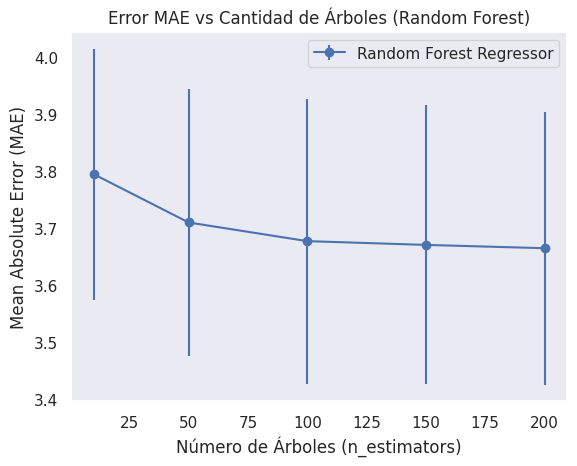

In [ ]:
#@title  Curvas para Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

n_estimators = [10, 50, 100, 150, 200]
rf_means, rf_stds = [], []

print("Probando diferentes cantidades de árboles en Random Forest...")

for n in n_estimators:
    model = RandomForestRegressor(n_estimators=n, random_state=42)
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=KFold(n_splits=10, shuffle=True, random_state=42),
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    mean = -scores.mean()
    std = scores.std()
    rf_means.append(mean)
    rf_stds.append(std)

    print(f"  Árboles = {n:>3} | MAE promedio = {mean:.4f} | Desv. estándar = ±{std:.4f}")

plt.figure()
plt.errorbar(n_estimators, rf_means, yerr=rf_stds, fmt='-o', label='Random Forest Regressor')
plt.title('Error MAE vs Cantidad de Árboles (Random Forest)')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

 evalúa cómo cambia el rendimiento del modelo a medida que se aumenta el número de árboles (estimadores) en el bosque aleatorio. Cuanto menor sea el MAE, mejor generaliza el modelo.

Analizando el impacto del kernel en SVR...
  ➤ Kernel: 'linear'
     → MAE promedio = 3.7245 | Desviación estándar = ±0.2709
  ➤ Kernel: 'rbf'
     → MAE promedio = 4.0723 | Desviación estándar = ±0.2291
  ➤ Kernel: 'poly'
     → MAE promedio = 4.0637 | Desviación estándar = ±0.2300


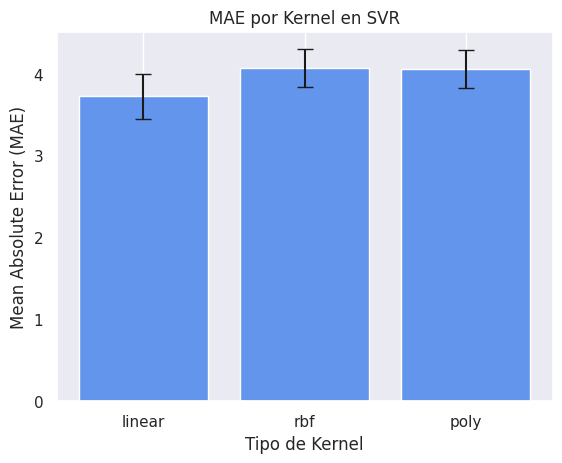

In [ ]:
#@title Curvas para SVM

kernels = ['linear', 'rbf', 'poly']
svm_means, svm_stds = [], []

print("Analizando el impacto del kernel en SVR...")

for k in kernels:
    print(f"  ➤ Kernel: '{k}'")
    model = SVR(kernel=k)
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=10,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    mean = -scores.mean()
    std = scores.std()
    svm_means.append(mean)
    svm_stds.append(std)
    print(f"     → MAE promedio = {mean:.4f} | Desviación estándar = ±{std:.4f}")

# Gráfico
plt.figure()
plt.bar(kernels, svm_means, yerr=svm_stds, capsize=6, color='cornflowerblue')
plt.title('MAE por Kernel en SVR')
plt.xlabel('Tipo de Kernel')
plt.ylabel('Mean Absolute Error (MAE)')
plt.grid(axis='y')
plt.show()

El kernel lineal obtuvo el MAE más bajo con un valor promedio de 3.7245, lo cual indica que, en este caso, es el modelo que mejor se ajusta a los datos de la variable interpersviolence.

Analizando impacto del número de folds en DT (Regresión)...
  ➤ KFold con 2 particiones
     → MAE promedio = 5.1183 | Desviación estándar = ±0.0079
  ➤ KFold con 3 particiones
     → MAE promedio = 5.0176 | Desviación estándar = ±0.0341
  ➤ KFold con 4 particiones
     → MAE promedio = 5.2118 | Desviación estándar = ±0.1411
  ➤ KFold con 5 particiones
     → MAE promedio = 5.1804 | Desviación estándar = ±0.1002
  ➤ KFold con 6 particiones
     → MAE promedio = 5.0373 | Desviación estándar = ±0.1068
  ➤ KFold con 7 particiones
     → MAE promedio = 5.1532 | Desviación estándar = ±0.2330
  ➤ KFold con 8 particiones
     → MAE promedio = 5.1108 | Desviación estándar = ±0.3497
  ➤ KFold con 9 particiones
     → MAE promedio = 5.1456 | Desviación estándar = ±0.2664
  ➤ KFold con 10 particiones
     → MAE promedio = 5.0354 | Desviación estándar = ±0.2607


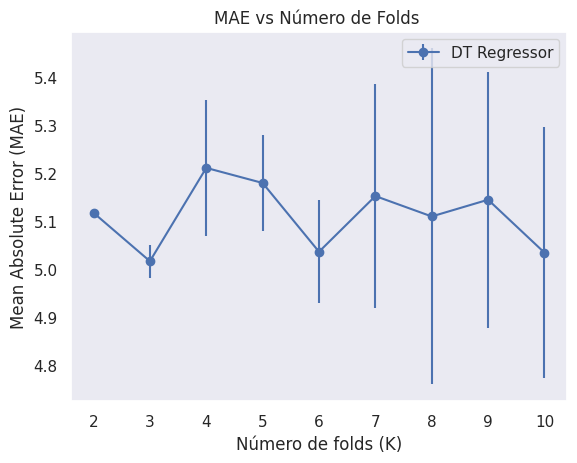

In [ ]:
#@title Curvas para Decision Tree con variación en la Validación Cruzada
folds = range(2, 11)
dt_means_kfolds = []
dt_stds_kfolds = []

print("Analizando impacto del número de folds en DT (Regresión)...")

for k in folds:
    print(f"  ➤ KFold con {k} particiones")
    model = DecisionTreeRegressor()
    scores = cross_val_score(
        model,
        X_train,
        y_train,
        cv=k,
        scoring='neg_mean_absolute_error',
        n_jobs=-1
    )
    mean = -scores.mean()
    std = scores.std()
    dt_means_kfolds.append(mean)
    dt_stds_kfolds.append(std)
    print(f"     → MAE promedio = {mean:.4f} | Desviación estándar = ±{std:.4f}")

# Gráfico
plt.figure()
plt.errorbar(folds, dt_means_kfolds, yerr=dt_stds_kfolds, fmt='-o', label='DT Regressor')
plt.title('MAE vs Número de Folds ')
plt.xlabel('Número de folds (K)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.legend()
plt.grid()
plt.show()

El MAE promedio no varía mucho entre los diferentes valores de k, lo que indica que el modelo tiene un desempeño relativamente estable frente a diferentes particiones del conjunto de datos.

El valor más bajo de MAE fue con 3 particiones (k=3):
MAE promedio = 5.0176

Esto sugiere que con k=3, el árbol de decisión se ajustó mejor a los datos sin sobreajustarse

#<font color="red">Entrega 3


---



In [2]:
#librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
#@title 3 capas ocultas de 128 neuronas, activación ReLU
#Separar características (X) y etiqueta (y)
X = df.drop(columns=['date', 'month', 'day', 'interpersviolence'])
y = df['interpersviolence']

#Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#modelo con 3 capas ocultas de 128 neuronas, activación ReLU
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Error cuadrático medio en test: {test_loss:.4f}")
print(f"Error absoluto medio en test: {test_mae:.4f}")

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 75.7474 - mae: 6.7650 - val_loss: 31.4878 - val_mae: 4.2683
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.5874 - mae: 3.9090 - val_loss: 29.6346 - val_mae: 4.1224
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.7034 - mae: 3.8436 - val_loss: 28.7311 - val_mae: 4.0321
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 26.3642 - mae: 3.8142 - val_loss: 28.1094 - val_mae: 3.9369
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.1420 - mae: 3.5619 - val_loss: 26.5643 - val_mae: 3.8400
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 22.0104 - mae: 3.4720 - val_loss: 26.8742 - val_mae: 3.9438
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.2342 - mae: 3.6700 - val_loss: 26.2965 - val_mae: 3.8440
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 21.1336 - mae: 3.5106 - val_loss: 25.7607 - val_mae: 3.8112
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss

In [ ]:
#@title 6 capas ocultas de 128 neuronas, activación ReLU
X = df.drop(columns=['date', 'month', 'day', 'interpersviolence'])
y = df['interpersviolence']

#Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# modelo con 6 capas ocultas de 128 neuronas, activación ReLU
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Error cuadrático medio en test: {test_loss:.4f}")
print(f"Error absoluto medio en test: {test_mae:.4f}")

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 75.7124 - mae: 6.6729 - val_loss: 31.7879 - val_mae: 4.2475
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 25.7806 - mae: 3.7555 - val_loss: 28.0735 - val_mae: 3.9901
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 23.5189 - mae: 3.6386 - val_loss: 28.6485 - val_mae: 3.9396
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 24.0291 - mae: 3.6112 - val_loss: 26.3927 - val_mae: 3.9184
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 24.4441 - mae: 3.6340 - val_loss: 26.1180 - val_mae: 3.7649
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.8033 - mae: 3.5977 - val_loss: 26.9056 - val_mae: 3.7489
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.7143 - mae: 3.4798 - val_loss: 25.5354 - val_mae: 3.7802
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 20.8814 - mae: 3.4090 - val_loss: 28.5411 - val_mae: 3.9504
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [ ]:
#@title 10 capas ocultas de 128 neuronas, activación ReLU
X = df.drop(columns=['date', 'month', 'day', 'interpersviolence'])
y = df['interpersviolence']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# modelo con 10 capas ocultas de 128 neuronas, activación ReLU
model = models.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Error cuadrático medio en test: {test_loss:.4f}")
print(f"Error absoluto medio en test: {test_mae:.4f}")

Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 74.2385 - mae: 6.7745 - val_loss: 32.3423 - val_mae: 4.2329
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.0329 - mae: 3.7004 - val_loss: 28.1951 - val_mae: 4.0079
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 29.4136 - mae: 3.9133 - val_loss: 26.5918 - val_mae: 3.9168
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 22.0569 - mae: 3.5137 - val_loss: 27.7505 - val_mae: 4.0477
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 24.3815 - mae: 3.6977 - val_loss: 27.0466 - val_mae: 3.9948
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 20.7986 - mae: 3.4771 - val_loss: 25.3527 - val_mae: 3.7457
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 18.1984 - mae: 3.2610 - val_loss: 27.1049 - val_mae: 3.7691
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 18.4125 - mae: 3.3426 - val_loss: 27.6920 - val_mae: 3.9440
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - l



---


Al comparar redes neuronales con 3, 6 y 10 capas ocultas (todas con 128 neuronas y activación ReLU), se observo que la red con 3 capas obtuvo el menor error en los datos de prueba. Esto sugiere que modelos más profundos comenzaron a sobreajustarse, es decir, aprendieron demasiado los datos de entrenamiento pero generalizaron peor en datos nuevos. Por lo tanto, para este problema, una red más simple es más efectiva.

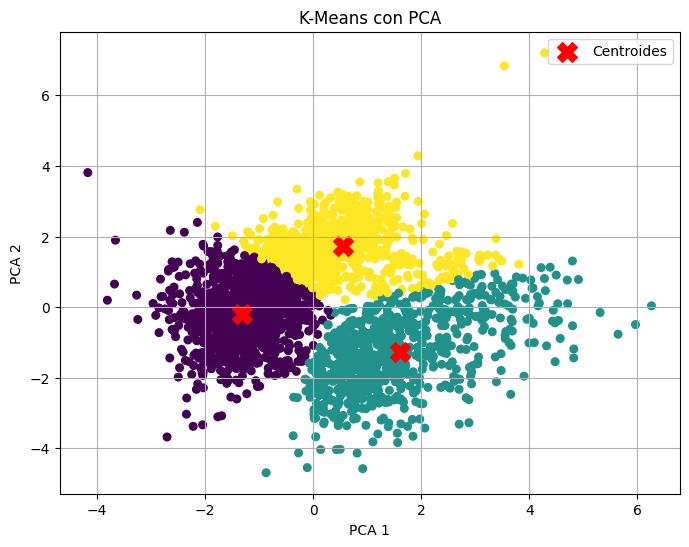

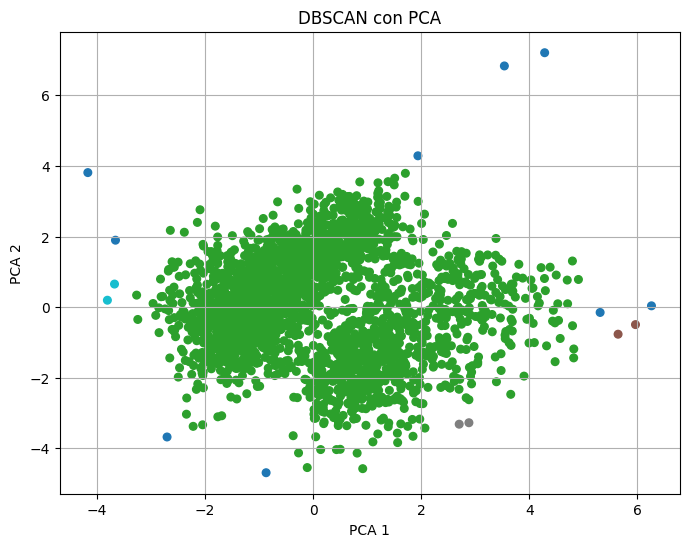

In [6]:
X = df.drop(columns=['date', 'month', 'day', 'interpersviolence'])
X = X.select_dtypes(include=['float64', 'int64'])  # asegurarse que todo sea numérico

# Escalar los datos antes de PCA y clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

#K-MEANS
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            color='red', marker='X', s=200, label='Centroides')
plt.title("K-Means con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.grid(True)
plt.show()

# DBSCAN
dbscan = DBSCAN(min_samples=2, eps=0.5)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='tab10', s=30)
plt.title("DBSCAN con PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()

In [13]:
df['Clases'] = kmeans_labels
group_stats = df.groupby('Clases')[['maxtemp', 'humid', 'moonlight', 'interpersviolence', 'homicides']].mean()
tabla2 = tabulate(group_stats.head(), headers='keys', tablefmt='fancy_grid')

print(tabla2)

╒══════════╤═══════════╤═════════╤═════════════╤═════════════════════╤═════════════╕
│   Clases │   maxtemp │   humid │   moonlight │   interpersviolence │   homicides │
╞══════════╪═══════════╪═════════╪═════════════╪═════════════════════╪═════════════╡
│        0 │   33.5543 │ 83.6826 │    0.492949 │             8.1266  │    0.789564 │
├──────────┼───────────┼─────────┼─────────────┼─────────────────────┼─────────────┤
│        1 │   33.2538 │ 82.233  │    0.483745 │            13.7906  │    1.47434  │
├──────────┼───────────┼─────────┼─────────────┼─────────────────────┼─────────────┤
│        2 │   32.7181 │ 77.4693 │    0.526705 │             9.04948 │    0.863568 │
╘══════════╧═══════════╧═════════╧═════════════╧═════════════════════╧═════════════╛


El análisis muestra que la clase 1 concentra la mayor proporción de casos de homicidios y violencia interpersonal. Las condiciones predominantes en este grupo incluyen una temperatura promedio de 33.25 °C y un nivel de humedad del 82.23 %, lo que sugiere una posible relación entre estas variables climáticas y la ocurrencia de actos violentos.